**General Additive Model**

---



**Fb-Prophet**

Instead of using correlation between values from similar time stamps, we can train our model on overall trends and add some seasonal effect to it. The principle behind GAM is similar to that of regression model. Unlike regression which uses individual predictor for outcome, GAM uses sum of smooth function to predict the outcome. The smooth functions here includes functions describing trend component, seasonal component, holiday component and so on. As GAM comprises of functions, we can isolate the individual function and evaluate its effect in prediction, which makes GAM more interpretable. An example of GAM is fbProphet.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

The data science team at Facebook found that by combining automatic forecasting with analyst-in-the-loop forecasts for special cases, it is possible to cover a wide variety of business use-cases. The following diagram illustrates the forecasting process used in prophet:
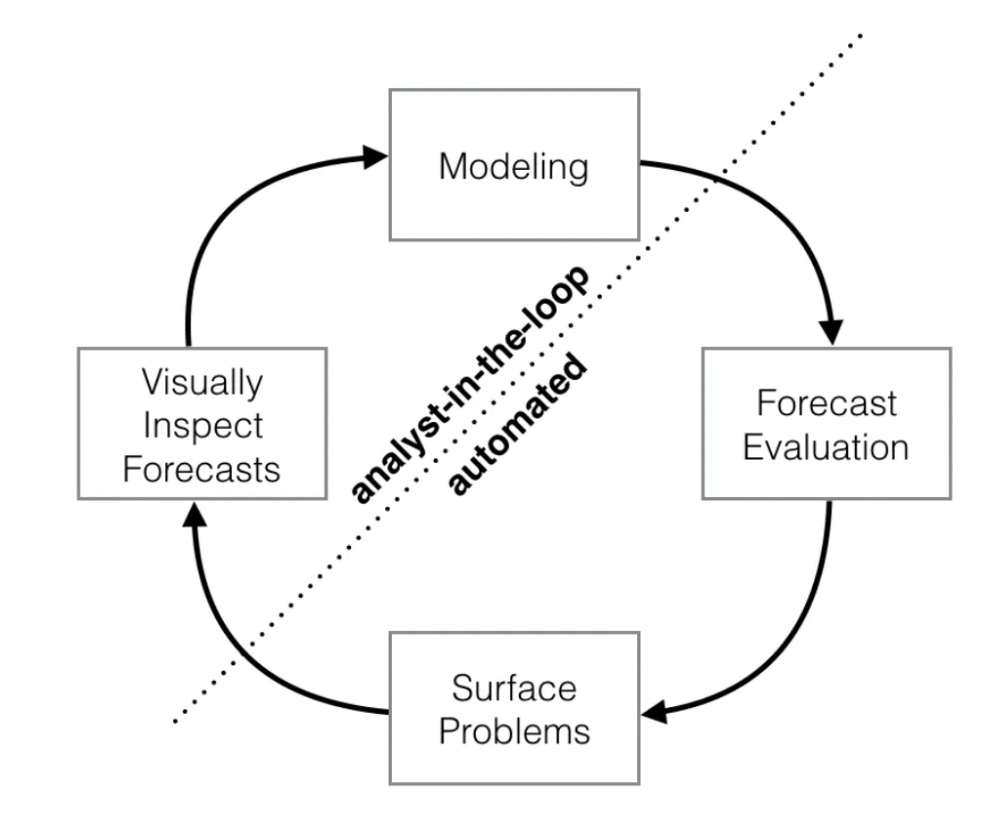

Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

y(t) = g(t) + s(t) + h(t) + e(t)

Here,

g(t) is a trend function which models the non-periodic changes. It can be either a linear function or a logistic function.

s(t) represents a periodic changes i.e weekly, monthly, yearly. An yearly seasonal component is modeled using Fourier series and weekly seasonal component using dummy variables.

h(t) is a function that represents the effect of holidays which occur on irregular schedules.(n≥1 days)

The term e(t) represents error changes that are not accommodated by the model.

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 88.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.p

In [27]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, concat
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from pandas import read_csv
import random

In [4]:
hr_data = pd.read_csv("HR_interpolated_data.csv")
hr_data.head()

,PatientID,Timestamp,Metric,Value
0,132540,0.00,HR,88.0
1,132540,0.01,HR,88.0
2,132540,0.02,HR,88.0
3,132540,0.03,HR,88.0
4,132540,0.04,HR,88.0


In [5]:
hr_data.shape

(5995837, 4)

In [3]:
resp_data = pd.read_csv("RespRate_interpolated_data.csv")
resp_data.head()

,PatientID,Timestamp,Metric,Value
0,132543,0.00,RespRate,17.0
1,132543,0.01,RespRate,17.0
2,132543,0.02,RespRate,17.0
3,132543,0.03,RespRate,17.0
4,132543,0.04,RespRate,17.0


In [6]:
resp_data.shape

(1006647, 4)

In [7]:
survival_data = read_csv('combined_data_with_survival.csv')

In [8]:
survival_data

,PatientID,Timestamp,HR,RespRate,In-hospital_death
0,132543,0.00,74.0,17.0,0
1,132543,0.01,74.0,17.0,0
2,132543,0.02,74.0,17.0,0
3,132543,0.03,74.0,17.0,0
4,132543,0.04,74.0,17.0,0
...,...,...,...,...,...
771661,142654,28.96,63.0,16.0,0
771662,142654,28.97,63.0,16.0,0
771663,142654,28.98,63.0,16.0,0
771664,142654,28.99,63.0,16.0,0


In [9]:
survival_data.shape

(771666, 5)

Check for the presence of null values

In [10]:
hr_nulls = hr_data.isnull().sum()
resp_nulls = resp_data.isnull().sum()
survival_nulls = survival_data.isnull().sum()

In [11]:
hr_nulls

PatientID    0
Timestamp    0
Metric       0
Value        0
dtype: int64

In [12]:
resp_nulls

PatientID    0
Timestamp    0
Metric       0
Value        0
dtype: int64

In [13]:
survival_nulls

PatientID            0
Timestamp            0
HR                   0
RespRate             0
In-hospital_death    0
dtype: int64

Visualize prevalent trends:

Choosing 5 random patients and visualizing the trends in their heart rates and respiratory rates

In [ ]:
common_patients = np.intersect1d(hr_data['PatientID'].unique(), resp_data['PatientID'].unique())

np.random.seed(0)
selected_patients = np.random.choice(common_patients, 5, replace=False)

In [ ]:
def plot_patient_data(patient_id, hr_data, resp_data, metric):
    plt.figure(figsize=(12, 6))
    patient_hr_data = hr_data[hr_data['PatientID'] == patient_id]
    patient_resp_data = resp_data[resp_data['PatientID'] == patient_id]

    if metric == 'HR':
        plt.plot(patient_hr_data['Timestamp'], patient_hr_data['Value'], label='Heart Rate')
        plt.title(f"Heart Rate Trend for Patient {patient_id}")
    elif metric == 'RespRate':
        plt.plot(patient_resp_data['Timestamp'], patient_resp_data['Value'], label='Respiration Rate')
        plt.title(f"Respiration Rate Trend for Patient {patient_id}")

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

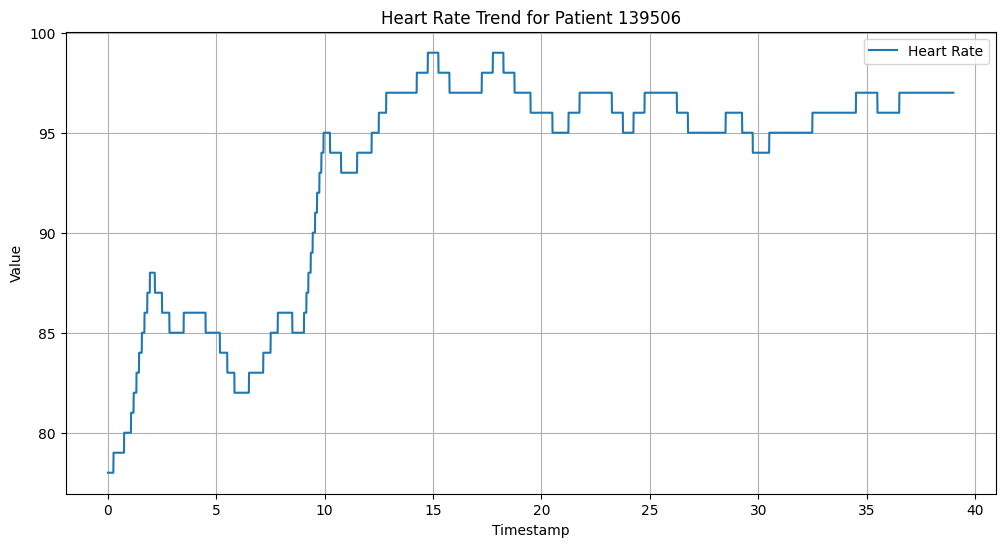

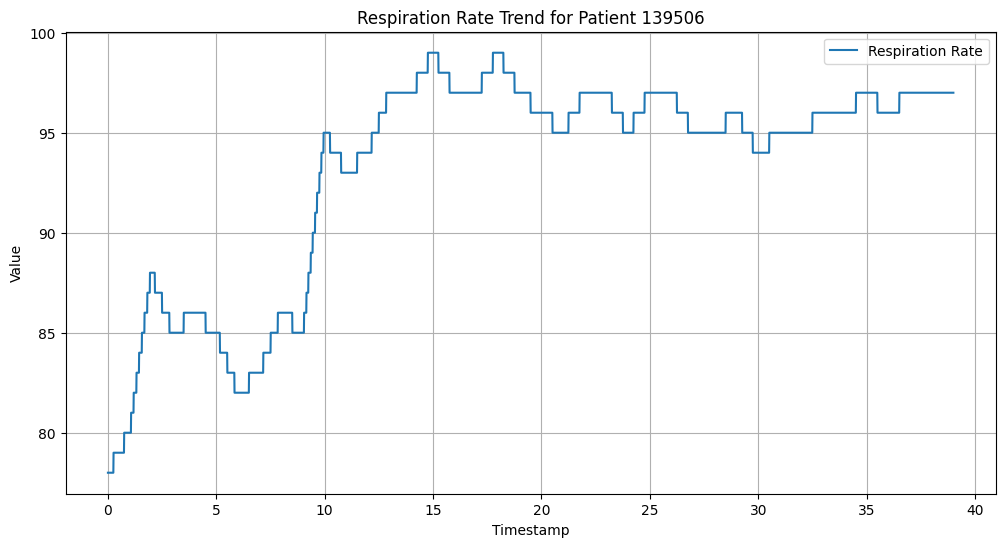

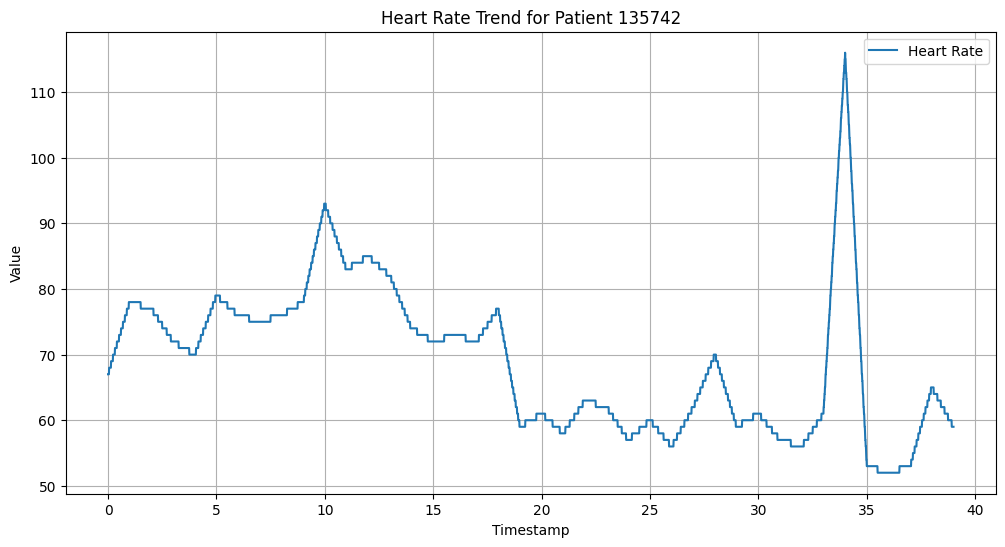

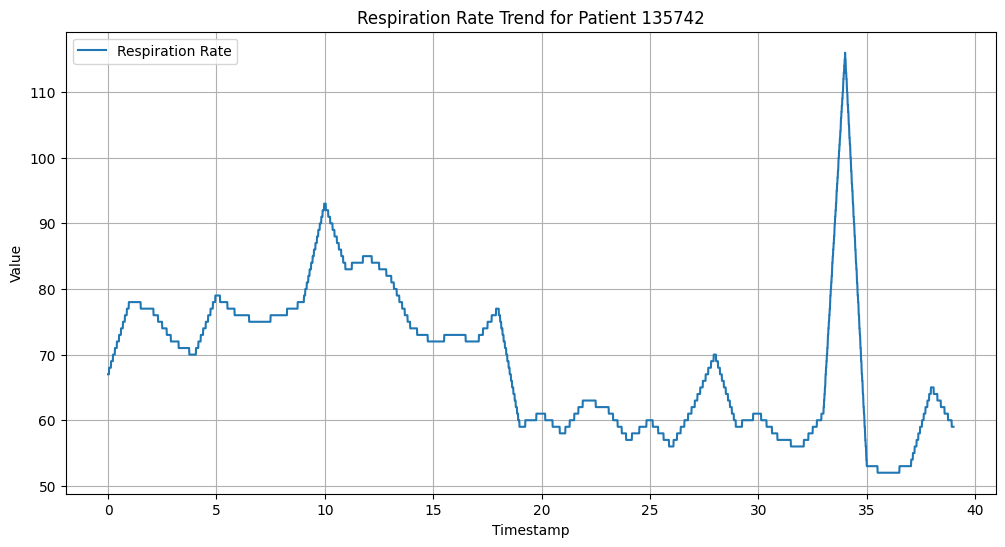

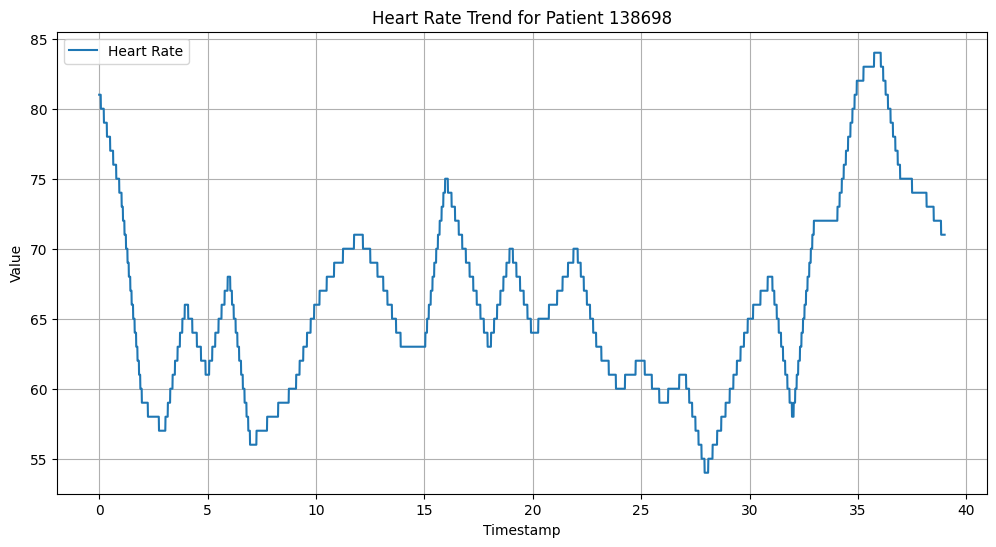

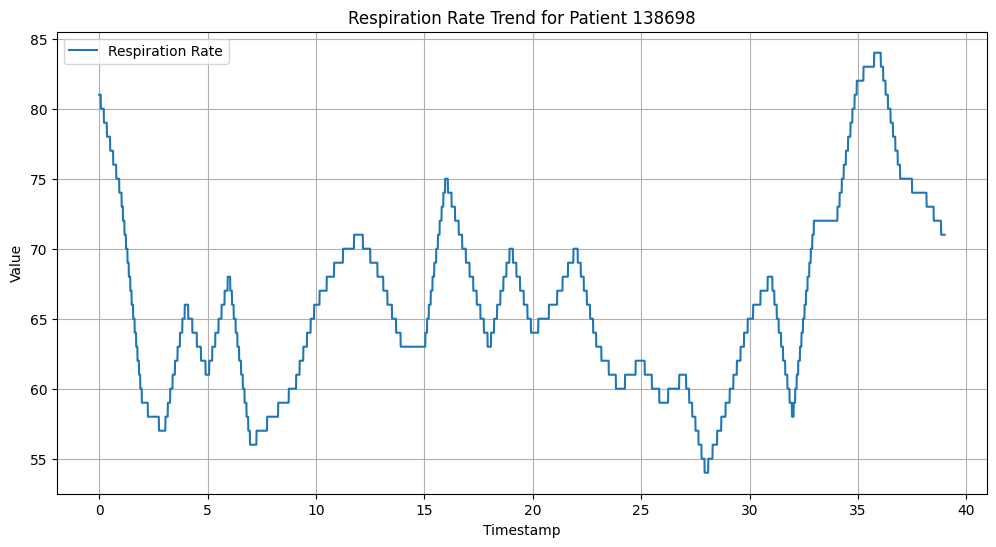

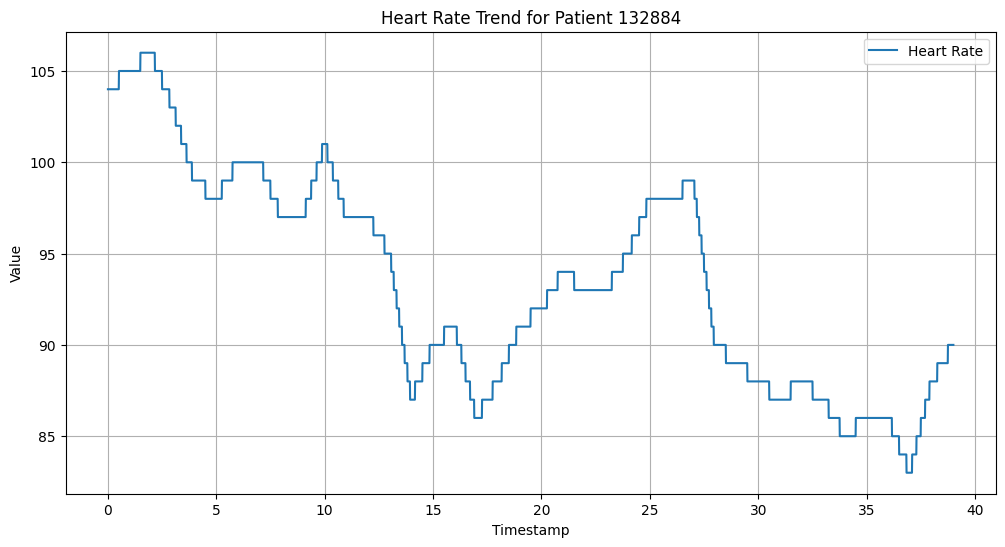

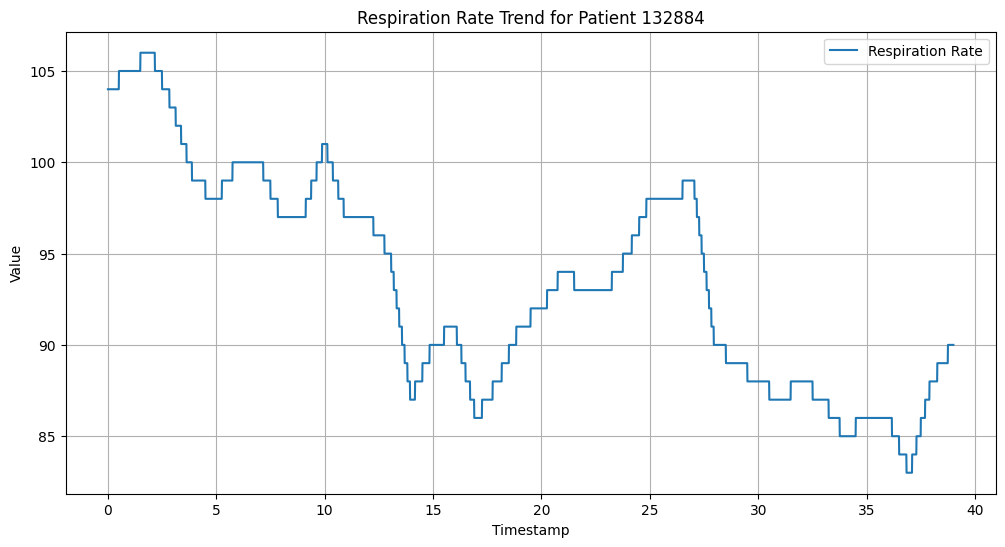

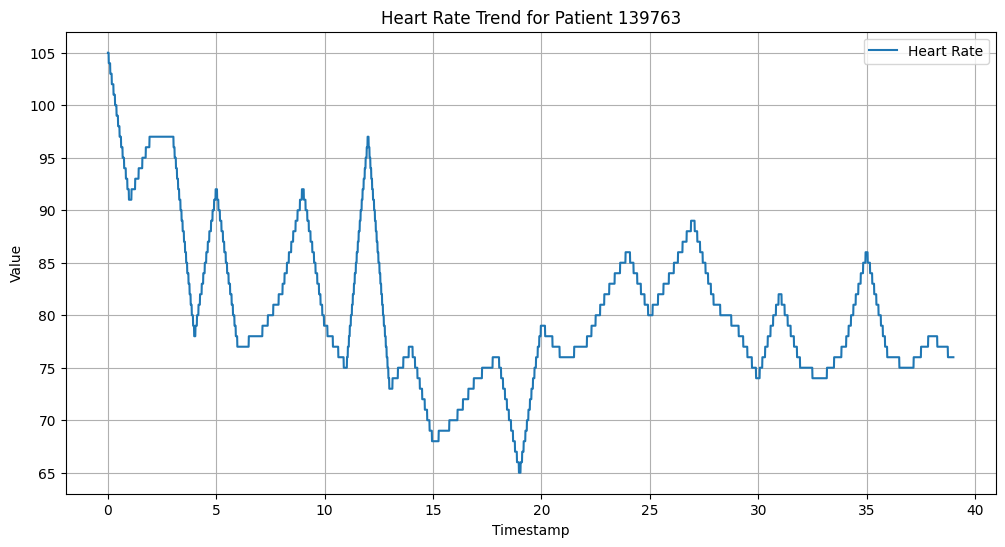

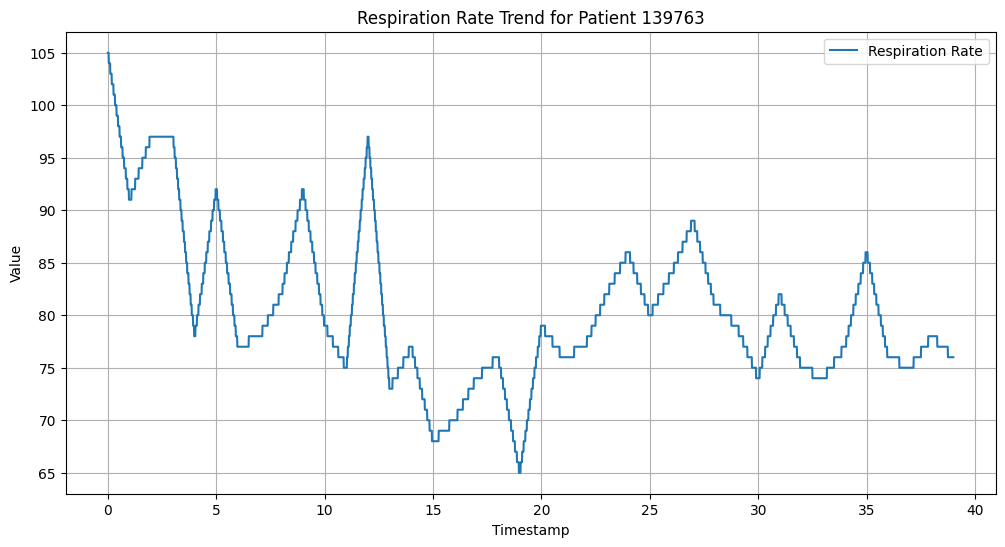

In [ ]:
for patient_id in selected_patients:
    plot_patient_data(patient_id, hr_data, resp_data, 'HR')
    plot_patient_data(patient_id, resp_data, hr_data, 'RespRate')

Run Prophet on each of the two dataframes

In [14]:
unique_patients = list(survival_data['PatientID'].unique())

In [15]:
len(unique_patients)

266

In [16]:
print(survival_data.groupby('PatientID').size().reset_index(name='NumDatapoints'))

     PatientID  NumDatapoints
0       132543           2901
1       132554           2901
2       132577           2901
3       132597           2901
4       132703           2901
..         ...            ...
261     142500           2901
262     142573           2901
263     142580           2901
264     142621           2901
265     142654           2901

[266 rows x 2 columns]


In [17]:
survival_data['Timestamp'] = survival_data.groupby('PatientID')['Timestamp'].transform(lambda x: (x - x.min()) / (x.max() - x.min()) * 2900 + 1)

In [18]:
survival_data

,PatientID,Timestamp,HR,RespRate,In-hospital_death
0,132543,1.0,74.0,17.0,0
1,132543,2.0,74.0,17.0,0
2,132543,3.0,74.0,17.0,0
3,132543,4.0,74.0,17.0,0
4,132543,5.0,74.0,17.0,0
...,...,...,...,...,...
771661,142654,2897.0,63.0,16.0,0
771662,142654,2898.0,63.0,16.0,0
771663,142654,2899.0,63.0,16.0,0
771664,142654,2900.0,63.0,16.0,0


In [19]:
values = survival_data.groupby('PatientID')['HR'].apply(list).apply(list).tolist()

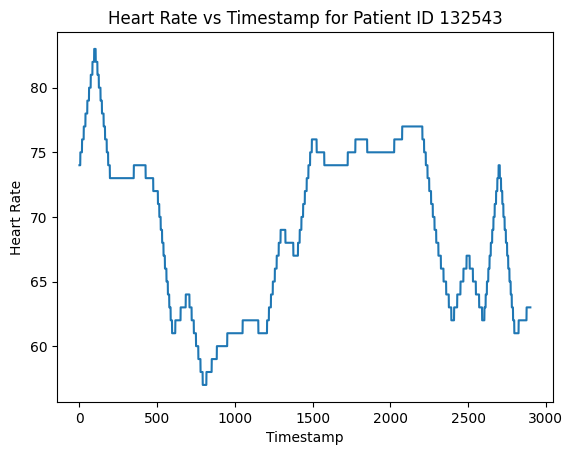

In [21]:
pyplot.title("Heart Rate vs Timestamp for Patient ID 132543")
pyplot.xlabel("Timestamp")
pyplot.ylabel("Heart Rate")
pyplot.plot(values[0])
pyplot.show()

In [84]:
def series_to_supervised(df, patient_id, n_in=1, n_out=1, dropnan=True):
    # Filter data for the specified patient ID
    patient_data = df[df['PatientID'] == patient_id][['PatientID', 'Timestamp', 'HR']].copy()

    # Prepare the DataFrame for Prophet with 'ds' and 'y' columns
    supervised_df = pd.DataFrame()
    supervised_df['ds'] = patient_data['Timestamp']
    supervised_df['y'] = patient_data['HR']

    if dropnan:
        supervised_df.dropna(inplace=True)

    print("Patient Data:")
    print(patient_data.head())

    return supervised_df


In [86]:
def series_to_supervised_RespRate(df, patient_id, n_in=1, n_out=1, dropnan=True):
    # Filter data for the specified patient ID
    patient_data = df[df['PatientID'] == patient_id][['PatientID', 'Timestamp', 'RespRate']].copy()

    # Prepare the DataFrame for Prophet with 'ds' and 'y' columns
    supervised_df = pd.DataFrame()
    supervised_df['ds'] = patient_data['Timestamp']
    supervised_df['y'] = patient_data['RespRate']

    if dropnan:
        supervised_df.dropna(inplace=True)

    print("Patient Data:")
    print(patient_data.head())

    return supervised_df


In [56]:
def train_test_split(data, n_test):
    return data.iloc[:-n_test], data.iloc[-n_test:]

In [57]:
def prophet_forecast(train, testX):
    model = Prophet()
    model.fit(train)
    future = pd.DataFrame({'ds': testX['ds']})
    forecast = model.predict(future)
    yhat = forecast['yhat'].values
    return yhat

In [60]:
def walk_forward_validation(data, n_test):
    predictions = []
    train, test = train_test_split(data, n_test)
    history = train.copy()

    for i in range(len(test)):
        testX = test.iloc[[i]]
        yhat = prophet_forecast(history, testX)
        predictions.append(yhat[0])
        history = history.append(testX)

    error = mean_absolute_error(test['y'].values, predictions)
    return error, test['y'].values, predictions

For 5 patients

In [106]:
random.seed(80)
random_patients = [random.randint(0, len(unique_patients)) for _ in range(5)]

In [30]:
patient_ids = [(unique_patients[index]) for index in random_patients]
patient_ids

[138022, 140414, 141015, 139791, 139739]

In [31]:
random_patients

[139, 201, 215, 188, 186]

In [103]:
hr_total_error=[]
hr_all_predictions=[]

In [104]:
for patient_id in patient_ids:
    # Transform the time series data into supervised learning
    data = series_to_supervised(survival_data, patient_id, n_in=100, n_out=100)
    print(f"Data for Patient ID {patient_id}:")
    print(data.head())

    # Perform walk-forward validation and get predictions
    error, testy, predictions = walk_forward_validation(data, 100)
    hr_all_predictions.append(predictions)
    hr_total_error.append(error)

    print(f"MAE for Patient ID {patient_id}: {error}")
    print(f"Test vs Predictions for Patient ID {patient_id}:", list(zip(testy, predictions)))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/10cxq9kc.json


Patient Data:
        PatientID  Timestamp    HR
403239     138022        1.0  74.0
403240     138022        2.0  74.0
403241     138022        3.0  74.0
403242     138022        4.0  74.0
403243     138022        5.0  74.0
Data for Patient ID 138022:
         ds     y
403239  1.0  74.0
403240  2.0  74.0
403241  3.0  74.0
403242  4.0  74.0
403243  5.0  74.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/x2wqmycd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69543', 'data', 'file=/tmp/tmpzp70cj11/10cxq9kc.json', 'init=/tmp/tmpzp70cj11/x2wqmycd.json', 'output', 'file=/tmp/tmpzp70cj11/prophet_modeli6f23pf6/prophet_model-20231114001107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAE for Patient ID 138022: 3.1010827238819854
Test vs Predictions for Patient ID 138022: [(101.0, 103.79581787823264), (101.0, 103.76313155296533), (101.0, 103.74090795067224), (101.0, 103.71203731645333), (101.0, 103.69316051553754), (101.0, 103.67031716662117), (101.0, 103.65720054780091), (101.0, 103.61556860743842), (101.0, 103.59952666617295), (101.0, 103.58251390157908), (101.0, 103.5655230514723), (101.0, 103.54260489624451), (101.0, 103.51322596588277), (101.0, 103.49038590864228), (101.0, 103.4669734966049), (101.0, 103.4585368046926), (100.0, 103.42147397976453), (100.0, 103.39467094990606), (100.0, 103.36641398798535), (100.0, 103.34242947732824), (100.0, 103.32269884973064), (100.0, 103.30032291894547), (100.0, 103.26241245811035), (100.0, 103.2375935119742), (100.0, 103.20385251670439), (100.0, 103.18332894663725), (100.0, 103.16007375556272), (100.0, 103.14227364985747), (100.0, 103.10326533812373), (100.0, 103.08333268787382), (100.0, 103.05767299402548), (100.0, 103.035

00:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/kw2hzm1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/_hbxk4a_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48787', 'data', 'file=/tmp/tmpzp70cj11/kw2hzm1r.json', 'init=/tmp/tmpz

MAE for Patient ID 140414: 2.4733584184974826
Test vs Predictions for Patient ID 140414: [(46.0, 42.71784002820979), (46.0, 42.73878472632337), (46.0, 42.75282701055933), (46.0, 42.775064072496086), (46.0, 42.82644953584463), (46.0, 42.823748458220045), (46.0, 42.813885880055004), (46.0, 42.90871033191971), (46.0, 42.921945668521076), (46.0, 42.900963396469415), (46.0, 42.96050866061815), (46.0, 42.968580163218455), (46.0, 42.972790974175965), (46.0, 43.011049512534896), (46.0, 43.0287030353473), (46.0, 43.031595278721625), (46.0, 43.08058665484399), (46.0, 43.120535857777334), (46.0, 43.09405128681375), (46.0, 43.096038641157556), (46.0, 43.11600504963709), (46.0, 43.154223234126235), (46.0, 43.14985265430228), (46.0, 43.20135290590033), (46.0, 43.204733413578744), (46.0, 43.21051118316476), (46.0, 43.22221117649781), (46.0, 43.25300536007376), (46.0, 43.24779917631153), (46.0, 43.24215483651958), (46.0, 43.260645309482335), (46.0, 43.28654145468852), (46.0, 43.26290768627432), (46.0,

00:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/uiw5h0gg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/egwm5mva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8613', 'data', 'file=/tmp/tmpzp70cj11/uiw5h0gg.json', 'init=/tmp/tmpzp

MAE for Patient ID 141015: 2.709479282820821
Test vs Predictions for Patient ID 141015: [(84.0, 83.14523892202936), (84.0, 83.13648774154845), (84.0, 83.15587018743705), (84.0, 83.19699492873576), (84.0, 83.18599065427674), (84.0, 83.21663076854182), (84.0, 83.209132697872), (85.0, 83.25875072796701), (85.0, 83.25166906789772), (85.0, 83.30832999126558), (85.0, 83.29947281016018), (85.0, 83.32724631568848), (85.0, 83.36021321962482), (85.0, 83.37346845917375), (85.0, 83.40139616075129), (85.0, 83.4462830388104), (85.0, 83.45343634860605), (85.0, 83.46255986549396), (85.0, 83.50959114457517), (85.0, 83.58524846264143), (85.0, 83.6139523103958), (86.0, 83.57158084040861), (86.0, 83.62502103632578), (86.0, 83.63550969129868), (86.0, 83.6713997025266), (86.0, 83.68650215704203), (86.0, 83.71946727054122), (86.0, 83.77259802960502), (86.0, 83.86630465069285), (86.0, 83.86141625952241), (86.0, 83.88082895624454), (86.0, 83.94597321174615), (86.0, 83.96607100006402), (86.0, 83.97494821215362)

00:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/vg5vth_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/p2sn8n3u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93766', 'data', 'file=/tmp/tmpzp70cj11/vg5vth_m.json', 'init=/tmp/tmpz

MAE for Patient ID 139791: 0.9040287503591325
Test vs Predictions for Patient ID 139791: [(105.0, 106.14271565236352), (105.0, 106.12232604913557), (105.0, 106.11231880520481), (105.0, 106.09418785278454), (105.0, 106.08691031666588), (105.0, 106.07183465422807), (105.0, 106.04973801193493), (105.0, 106.04602094276835), (105.0, 106.02873634229955), (105.0, 106.01073337475114), (105.0, 105.99005153776275), (105.0, 105.9835027803423), (105.0, 105.96060299218931), (105.0, 105.95185031396436), (105.0, 105.93342787180812), (105.0, 105.91907755900537), (105.0, 105.90627514621461), (105.0, 105.88517983882176), (105.0, 105.87683787507153), (105.0, 105.856514167116), (105.0, 105.84673961425537), (105.0, 105.83437942921661), (105.0, 105.81920560541599), (105.0, 105.80610433545877), (105.0, 105.79600757561724), (105.0, 105.77924305159169), (105.0, 105.76100299580179), (105.0, 105.75447650785979), (105.0, 105.74222061781481), (105.0, 105.721189919068), (105.0, 105.70731826017676), (105.0, 105.6909

00:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/6snxqaqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/reoi5g5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94368', 'data', 'file=/tmp/tmpzp70cj11/6snxqaqz.json', 'init=/tmp/tmpz

MAE for Patient ID 139739: 2.6817854911174566
Test vs Predictions for Patient ID 139739: [(66.0, 65.74279683224447), (66.0, 65.76805934558153), (66.0, 65.79573062572257), (66.0, 65.81776096785606), (66.0, 65.83924867069437), (66.0, 65.84201101650132), (66.0, 65.86732111383931), (66.0, 65.87279591955152), (65.0, 65.896126470927), (65.0, 65.89588181394028), (65.0, 65.89857409065009), (65.0, 65.90310353803159), (65.0, 65.89774207143374), (65.0, 65.9036623559351), (65.0, 65.9070254681349), (65.0, 65.9098329169402), (65.0, 65.91712365448709), (65.0, 65.92534654443874), (65.0, 65.91322637152899), (65.0, 65.91107625833338), (65.0, 65.91363802506802), (65.0, 65.920903422433), (65.0, 65.91903539032992), (65.0, 65.92845976163429), (64.0, 65.92055485203981), (64.0, 65.91549474954185), (64.0, 65.92160129656423), (64.0, 65.90400236994373), (64.0, 65.90388761214355), (64.0, 65.89836236814487), (64.0, 65.89376562866538), (64.0, 65.88429453015432), (64.0, 65.89209828426817), (64.0, 65.8727553482098), 

<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)


In [108]:
print("Average mean average error across all patients = ", sum(hr_total_error)/len(hr_total_error))

Average mean average error across all patients =  2.373946933335376


In [121]:
hr_all_predictions

[[103.79581787823264,
  103.76313155296533,
  103.74090795067224,
  103.71203731645333,
  103.69316051553754,
  103.67031716662117,
  103.65720054780091,
  103.61556860743842,
  103.59952666617295,
  103.58251390157908,
  103.5655230514723,
  103.54260489624451,
  103.51322596588277,
  103.49038590864228,
  103.4669734966049,
  103.4585368046926,
  103.42147397976453,
  103.39467094990606,
  103.36641398798535,
  103.34242947732824,
  103.32269884973064,
  103.30032291894547,
  103.26241245811035,
  103.2375935119742,
  103.20385251670439,
  103.18332894663725,
  103.16007375556272,
  103.14227364985747,
  103.10326533812373,
  103.08333268787382,
  103.05767299402548,
  103.03506352350311,
  103.0065676145667,
  102.9839127386353,
  102.94759831397307,
  102.93875569836852,
  102.91390716670188,
  102.89046965074303,
  102.86419287328758,
  102.83299215395209,
  102.82046279503527,
  102.80338377857781,
  102.77906026145321,
  102.74599352202189,
  102.71360628290086,
  102.7011590727

In [122]:
len(hr_all_predictions)

5

In [129]:
rounded_predictions = [[round(pred, 0) for pred in sublist] for sublist in hr_all_predictions]

In [132]:
rounded_predictions = [[int(j) for j in i] for i in rounded_predictions]

In [133]:
len(rounded_predictions)

5

In [134]:
rounded_predictions

[[104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  104,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  103,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  102,
  101,
  101,
  101,
  101,
  101,
  101],
 [43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,
  43,

In [135]:
def plot_predictions(predictions):
    highlight_predictions = [pred if pred >= 100 or pred <= 60 else None for pred in predictions]

    timesteps = np.arange(2802, 2902)

    plt.plot(timesteps, predictions, label='Predictions', marker='o', linestyle='-', color='orange')
    plt.plot(timesteps, highlight_predictions, label='Predictions exceeding threshold', marker='o', color='red')

    plt.title('Heart Rate Prediction for 100 Timesteps')
    plt.xlabel('Timestep')
    plt.ylabel('Heart Rate')
    # plt.gca().set_yticklabels([f'{int(y)}' for y in plt.gca().get_yticks()])
    plt.legend()
    plt.show()

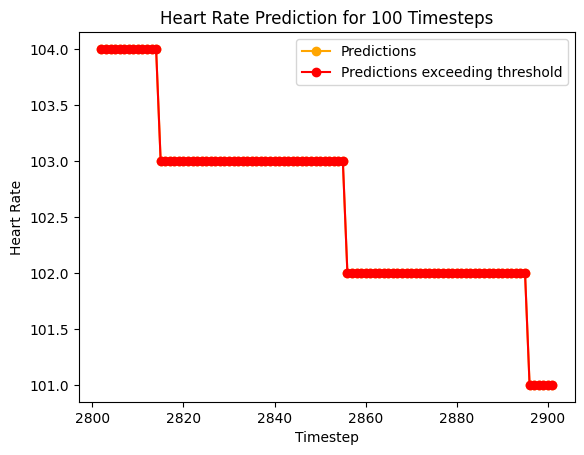

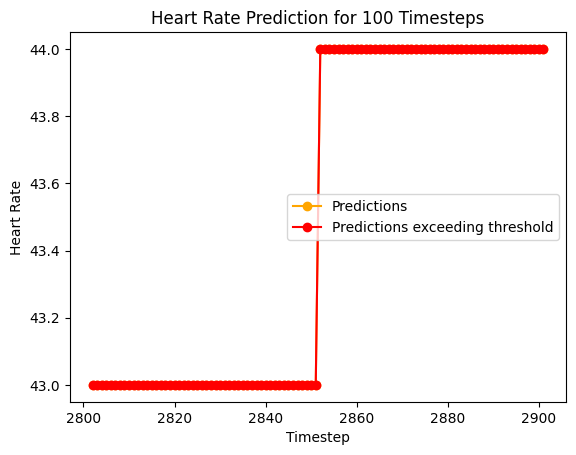

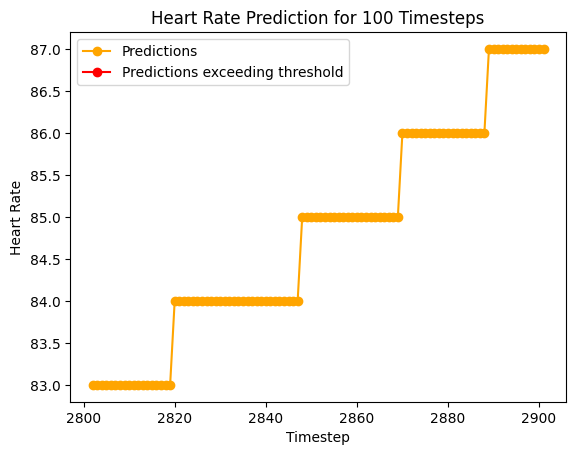

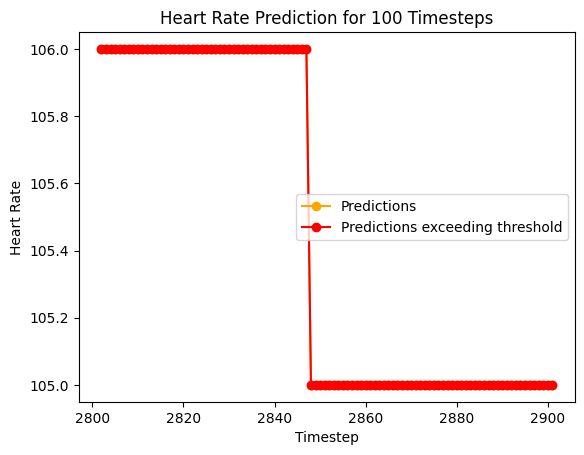

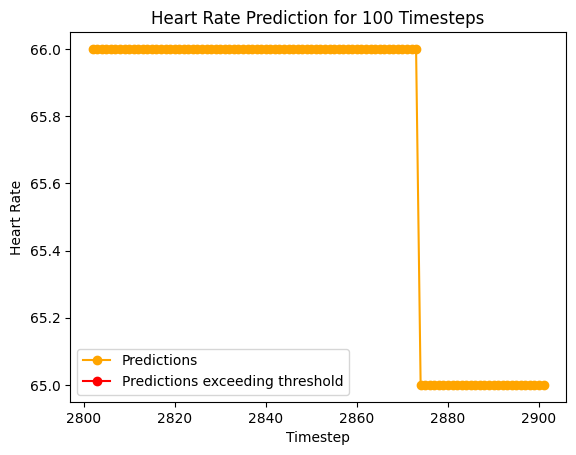

In [136]:
for i in range(len(rounded_predictions)):
  plot_predictions(rounded_predictions[i])

In [113]:
def get_og_values(series,patientid):
  values = list(series[series['PatientID'] == patientid]['HR'])
  return values

In [114]:
def plot_combined_values(og, predictions):
    timestamps = list(range(1, 2902))
    combined_df = pd.DataFrame({
        'Timestamp': timestamps,
        'Value': og+predictions
    })

    # Plot the values against Timestamp
    plt.plot(combined_df['Timestamp'][:2901], combined_df['Value'][:2901], marker='o', linestyle='-', color='blue', label='Original Values')

    # Highlight values below 60 or above 100 in red
    threshold_low = 60
    threshold_high = 100
    highlight_indices = np.where((combined_df['Value'] < threshold_low) | (combined_df['Value'] > threshold_high))[0]
    #plt.scatter(combined_df['Timestamp'].iloc[highlight_indices], combined_df['Value'].iloc[highlight_indices], color='red', label='Abnormal Rate',zorder=5)

    # Print predicted values in a different color (red)
    predicted_indices = range(len(og), len(og) + len(predictions))
    plt.scatter(combined_df['Timestamp'].iloc[predicted_indices], combined_df['Value'].iloc[predicted_indices], color='green', label='Predicted Values', zorder=3)

    plt.title('Original vs Predicted Values')
    plt.xlabel('Timestamp (seconds)')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [115]:
all_values=[]

Plotting for patient ID: 138022


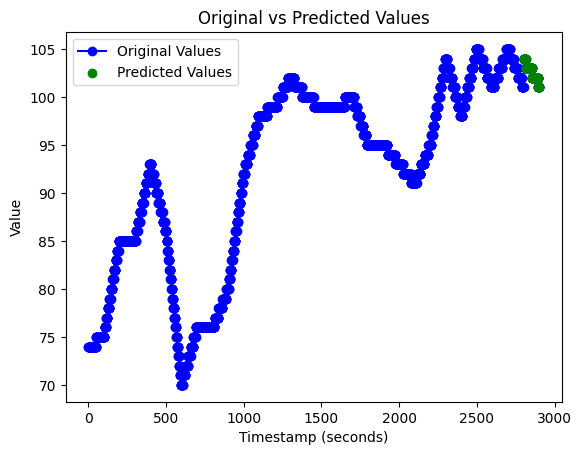

Plotting for patient ID: 140414


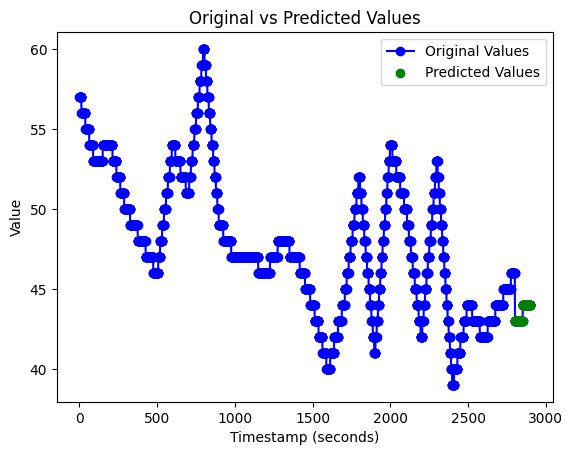

Plotting for patient ID: 141015


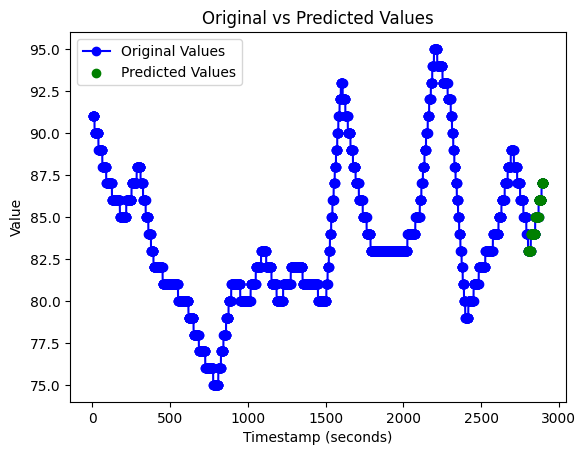

Plotting for patient ID: 139791


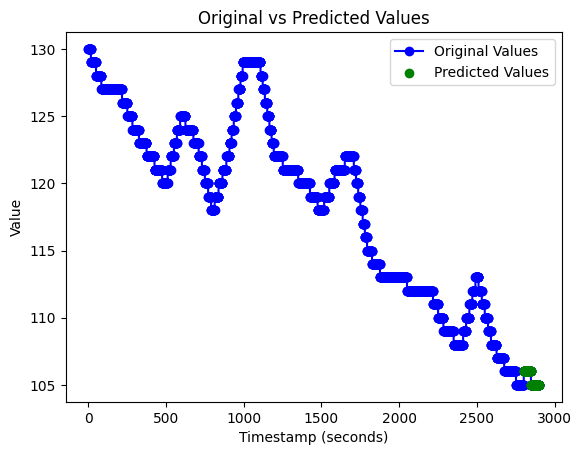

Plotting for patient ID: 139739


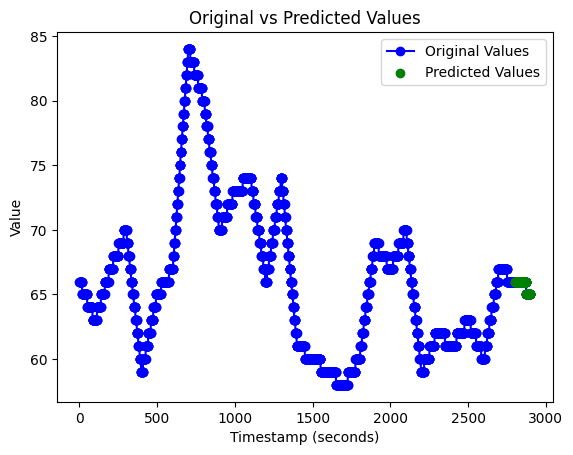

In [137]:
i=0
for pid in patient_ids:
  og=get_og_values(survival_data,pid)
  new_og=og[:2801]
  predictions=rounded_predictions[i]
  all_values.append(new_og+predictions)
  print("Plotting for patient ID:", pid)
  plot_combined_values(new_og,list(predictions))
  i+=1

In [79]:
result_df = pd.DataFrame({'PatientID': [p for p, values in zip(patient_ids, all_values) for _ in range(len(values))],
                   'HR': [val for values in all_values for val in values]})

In [80]:
result_df

,PatientID,HR
0,138022,74.000000
1,138022,74.000000
2,138022,74.000000
3,138022,74.000000
4,138022,74.000000
...,...,...
14500,139739,65.012399
14501,139739,64.987580
14502,139739,64.970159
14503,139739,64.943665


Respiratory Rate

In [81]:
rr_values = survival_data.groupby('PatientID')['RespRate'].apply(list).apply(list).tolist()

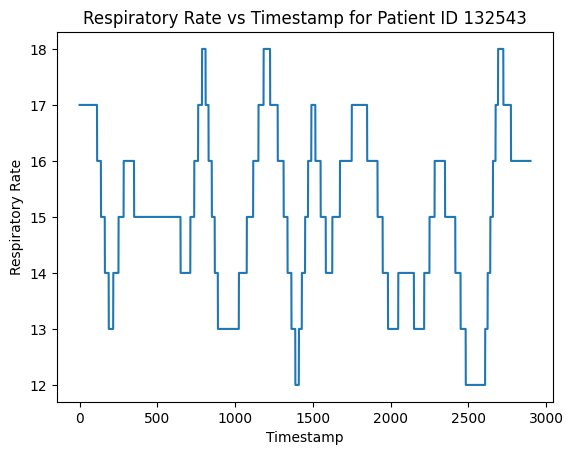

In [82]:
# plot dataset
pyplot.title("Respiratory Rate vs Timestamp for Patient ID 132543")
pyplot.xlabel("Timestamp")
pyplot.ylabel("Respiratory Rate")
pyplot.plot(rr_values[0])
pyplot.show()

In [138]:
rr_total_error=[]
rr_all_predictions=[]

In [139]:
for patient_id in patient_ids:
    # Transform the time series data into supervised learning
    data = series_to_supervised_RespRate(survival_data, patient_id, n_in=100, n_out=100)
    print(f"Data for Patient ID {patient_id}:")
    print(data.head())

    # Perform walk-forward validation and get predictions
    error, testy, predictions = walk_forward_validation(data, 100)
    rr_all_predictions.append(predictions)
    rr_total_error.append(error)

    print(f"MAE for Patient ID {patient_id}: {error}")
    print(f"Test vs Predictions for Patient ID {patient_id}:", list(zip(testy, predictions)))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/dpjj36j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/kxs2p2gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52152', 'data', 'file=/tmp/tmpzp70cj11/dpjj36j5.json', 'init=/tmp/tmpzp70cj11/kxs2p2gw.json', 'output', 'file=/tmp/tmpzp70cj11/prophet_modelmzh06bjd/prophet_model-20231114013900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:39:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Patient Data:
        PatientID  Timestamp  RespRate
403239     138022        1.0      18.0
403240     138022        2.0      18.0
403241     138022        3.0      18.0
403242     138022        4.0      18.0
403243     138022        5.0      18.0
Data for Patient ID 138022:
         ds     y
403239  1.0  18.0
403240  2.0  18.0
403241  3.0  18.0
403242  4.0  18.0
403243  5.0  18.0


01:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/hftj9_e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/djry033g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57166', 'data', 'file=/tmp/tmpzp70cj11/hftj9_e8.json', 'init=/tmp/tmpz

MAE for Patient ID 138022: 4.3158426521293505
Test vs Predictions for Patient ID 138022: [(15.0, 19.396330858047303), (15.0, 19.363756217750304), (15.0, 19.355926392313933), (15.0, 19.259877711330795), (15.0, 19.26218606811421), (15.0, 19.24099785842442), (15.0, 19.226168459554803), (15.0, 19.210023684189213), (15.0, 19.18395988065105), (15.0, 19.158148414069668), (15.0, 19.09909305389932), (15.0, 19.105010277715287), (15.0, 19.05768272747453), (15.0, 19.02010417105978), (15.0, 19.046392350553077), (15.0, 18.9843345414112), (14.0, 18.934834668850108), (14.0, 18.914015067438132), (14.0, 18.86758927598057), (14.0, 18.88632570855852), (14.0, 18.785902382125975), (14.0, 18.77882458570772), (14.0, 18.729198791548868), (14.0, 18.705196936539554), (14.0, 18.659500289698908), (14.0, 18.63477607509333), (14.0, 18.56663761276659), (14.0, 18.536418096420565), (14.0, 18.59412914880527), (14.0, 18.565208713371096), (14.0, 18.49773707093959), (14.0, 18.46031714106128), (14.0, 18.403571327008006), (1

01:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/dx0lbjz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/synectf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91089', 'data', 'file=/tmp/tmpzp70cj11/dx0lbjz9.json', 'init=/tmp/tmpz

MAE for Patient ID 140414: 4.439017795238401
Test vs Predictions for Patient ID 140414: [(18.0, 14.688676702057755), (18.0, 14.704108809149659), (18.0, 14.738733912301347), (18.0, 14.763034521556264), (18.0, 14.784786921147482), (18.0, 14.794428005001519), (18.0, 14.830962000413527), (18.0, 14.852943764615242), (18.0, 14.86654760200871), (19.0, 14.888194311697937), (19.0, 14.927170018344658), (19.0, 14.954629470980121), (19.0, 14.990348599527834), (19.0, 14.994642582913912), (19.0, 15.035176818788758), (19.0, 15.063874104490386), (19.0, 15.090540996652319), (19.0, 15.132430265983174), (19.0, 15.142493806684744), (19.0, 15.171020865011762), (19.0, 15.199930154259912), (19.0, 15.228586431352149), (19.0, 15.264054795028176), (19.0, 15.293195932441062), (19.0, 15.314835539103807), (19.0, 15.346530538993518), (19.0, 15.380248551593404), (19.0, 15.399522991541575), (19.0, 15.420134477702623), (20.0, 15.445284974410704), (20.0, 15.472884717243334), (20.0, 15.503362934860444), (20.0, 15.533257

01:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/sbfnh4wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/6p62eqfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46289', 'data', 'file=/tmp/tmpzp70cj11/sbfnh4wi.json', 'init=/tmp/tmpz

MAE for Patient ID 141015: 1.2183565290463856
Test vs Predictions for Patient ID 141015: [(22.0, 23.435857905069657), (22.0, 23.410426080035045), (22.0, 23.410184217092155), (22.0, 23.43028048385156), (22.0, 23.412814211355805), (22.0, 23.40135712897407), (22.0, 23.387497765681438), (22.0, 23.375709121037342), (22.0, 23.41261797458543), (22.0, 23.412530669450675), (22.0, 23.366584514571585), (22.0, 23.353532671223405), (22.0, 23.379207699882954), (22.0, 23.366076889577453), (22.0, 23.352737629706198), (22.0, 23.324410424631477), (22.0, 23.37738117368678), (22.0, 23.35604749063197), (22.0, 23.33678196183181), (22.0, 23.34178767618649), (22.0, 23.341738068327995), (22.0, 23.34497250841361), (22.0, 23.330054695648876), (22.0, 23.339481392924117), (22.0, 23.327238729485483), (22.0, 23.3363929481924), (22.0, 23.34346564127401), (22.0, 23.295451908333252), (22.0, 23.301661228021317), (22.0, 23.317965819395564), (22.0, 23.367430703523123), (22.0, 23.2790100399325), (22.0, 23.382864665106485),

01:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/6hp06smc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/zwatojen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79111', 'data', 'file=/tmp/tmpzp70cj11/6hp06smc.json', 'init=/tmp/tmpz

MAE for Patient ID 139791: 0.5029780027518622
Test vs Predictions for Patient ID 139791: [(13.0, 14.304532510219442), (13.0, 14.28198077882147), (13.0, 14.262079591896645), (13.0, 14.250217194463534), (13.0, 14.226555383834034), (13.0, 14.21125342162892), (13.0, 14.180925837777579), (13.0, 14.179383935018134), (13.0, 14.136362918430864), (13.0, 14.121719704712362), (13.0, 14.106900527156695), (13.0, 14.078122940123295), (13.0, 14.049983173052981), (13.0, 14.041046982369696), (13.0, 14.01963090927208), (13.0, 14.001369331837486), (13.0, 13.977296521472327), (13.0, 13.949215373200575), (13.0, 13.938200626615393), (13.0, 13.916543953304087), (13.0, 13.902078433959334), (13.0, 13.866937555752271), (13.0, 13.856473531114942), (13.0, 13.83212667937807), (13.0, 13.813828708950005), (13.0, 13.797396883088837), (13.0, 13.774626559218023), (13.0, 13.761881698014278), (13.0, 13.730746985101948), (13.0, 13.706856154301823), (13.0, 13.697614035733652), (13.0, 13.682345716444415), (13.0, 13.65235432

01:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/62m371x1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp70cj11/1n25l_b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76959', 'data', 'file=/tmp/tmpzp70cj11/62m371x1.json', 'init=/tmp/tmpz

MAE for Patient ID 139739: 1.4563970968204296
Test vs Predictions for Patient ID 139739: [(17.0, 16.460631043984677), (17.0, 16.466529417716878), (17.0, 16.472999396439672), (17.0, 16.475292923929345), (17.0, 16.480220138061757), (17.0, 16.47989228897201), (17.0, 16.485992742990227), (17.0, 16.492710965058993), (17.0, 16.498373405466577), (17.0, 16.50524408270473), (17.0, 16.510295990539646), (17.0, 16.525015467219777), (16.0, 16.527216587010276), (16.0, 16.533059249337036), (16.0, 16.532958359520176), (16.0, 16.534939829000574), (16.0, 16.535310235765323), (16.0, 16.5372974885841), (16.0, 16.536190153954205), (16.0, 16.537331867571808), (16.0, 16.536213088210665), (16.0, 16.53219063221828), (16.0, 16.533301881607624), (16.0, 16.531447390303104), (16.0, 16.526635968214826), (16.0, 16.526016900115707), (16.0, 16.52152317682507), (16.0, 16.513375588559526), (16.0, 16.51119648363806), (16.0, 16.51509018696204), (16.0, 16.51140928375852), (16.0, 16.510469619572266), (16.0, 16.5067595125527

<ipython-input-60-8e2a8840fa7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(testX)


In [140]:
print("Average mean average error across all patients = ", sum(total_error)/len(total_error))

Average mean average error across all patients =  2.3865184151972856


In [141]:
len(rr_all_predictions)

5

In [144]:
rr_rounded_predictions = [[round(pred, 0) for pred in sublist] for sublist in rr_all_predictions]
rr_rounded_predictions = [[int(j) for j in i] for i in rounded_predictions]

In [145]:
len(rr_rounded_predictions)

5

In [146]:
rr_rounded_predictions

[[19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  16,
  17,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16],
 [15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  1

In [147]:
def plot_predictions(predictions):
    highlight_predictions = [pred if pred > 20 or pred < 12 else None for pred in predictions]

    timesteps = np.arange(2802, 2902)

    plt.plot(timesteps, predictions, label='Predictions', marker='o', linestyle='-', color='orange')
    plt.plot(timesteps, highlight_predictions, label='Predictions exceeding threshold', marker='o', color='red')

    plt.title('Respiratory Rate Prediction for 100 Timesteps')
    plt.xlabel('Timestep')
    plt.ylabel('Respiratory Rate')
    plt.legend()
    plt.show()

Plot future predictions for each patient and indicate abnormalities

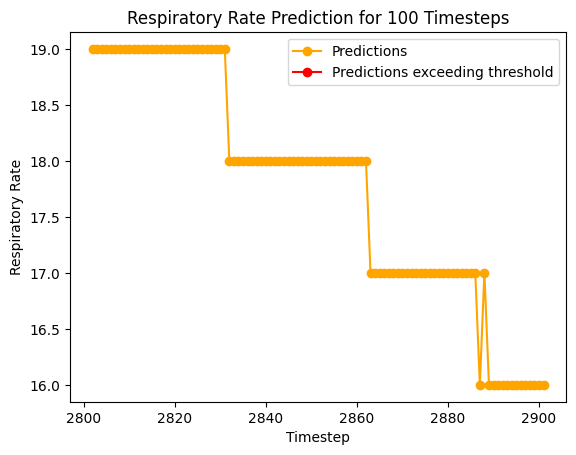

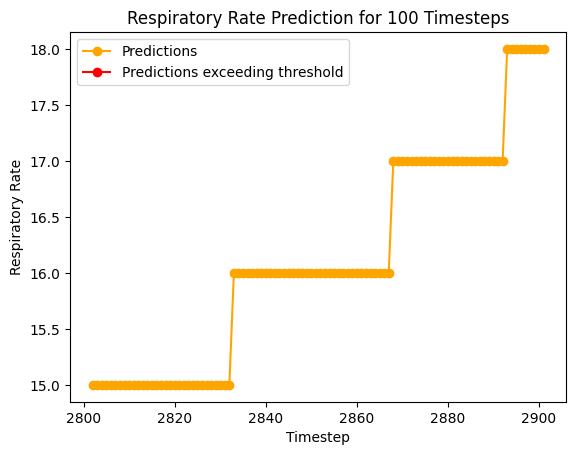

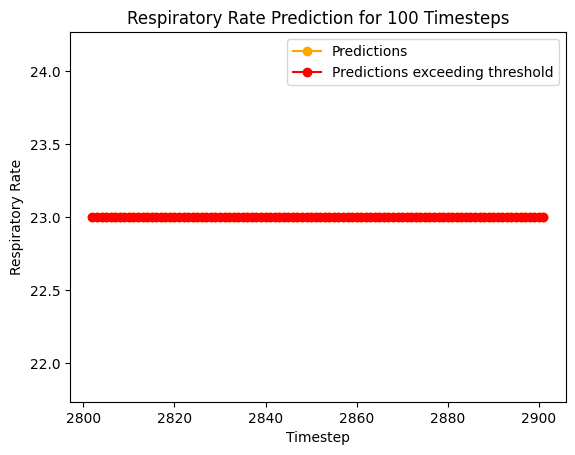

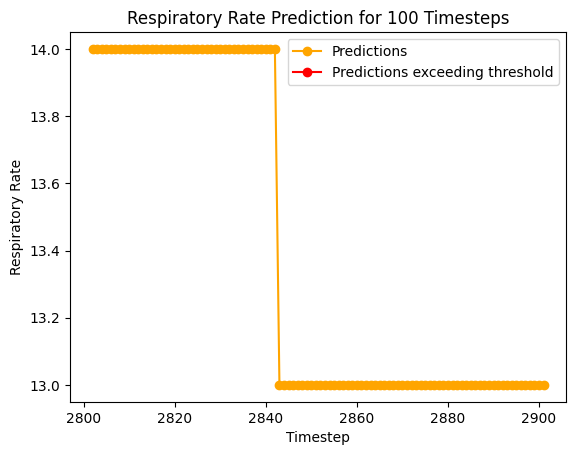

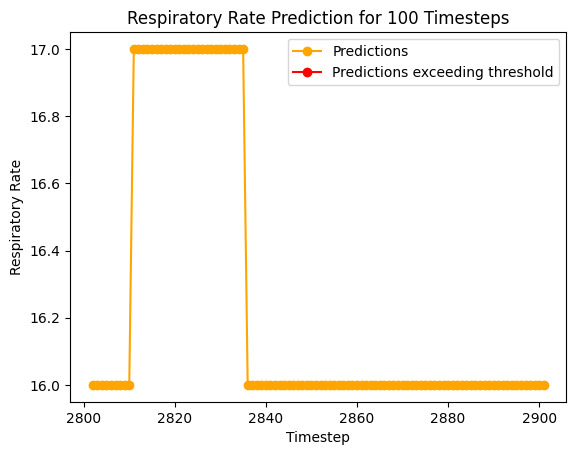

In [148]:
for i in range(len(rr_rounded_predictions)):
  plot_predictions(rr_rounded_predictions[i])

Plot all values for patients to assess continuation in trends

In [149]:
def get_og_values(series,patientid):
  values = list(series[series['PatientID'] == patientid]['RespRate'])
  return values

In [150]:
def plot_combined_values(og, predictions):
    timestamps = list(range(1, 2902))
    combined_df = pd.DataFrame({
        'Timestamp': timestamps,
        'Value': og+predictions
    })

    # Plot the values against Timestamp
    plt.plot(combined_df['Timestamp'][:2901], combined_df['Value'][:2901], marker='o', linestyle='-', color='blue', label='Original Values')

    # Highlight values below 12 or above 20 in red
    threshold_low = 12
    threshold_high = 20
    highlight_indices = np.where((combined_df['Value'] < threshold_low) | (combined_df['Value'] > threshold_high))[0]
    #plt.scatter(combined_df['Timestamp'].iloc[highlight_indices], combined_df['Value'].iloc[highlight_indices], color='red', label='Abnormal Rate',zorder=5)

    # Print predicted values in a different color (red)
    predicted_indices = range(len(og), len(og) + len(predictions))
    plt.scatter(combined_df['Timestamp'].iloc[predicted_indices], combined_df['Value'].iloc[predicted_indices], color='green', label='Predicted Values', zorder=3)

    plt.title('Original vs Predicted Values')
    plt.xlabel('Timestamp (seconds)')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [151]:
all_resp_values=[]

Plotting for patient ID: 138022


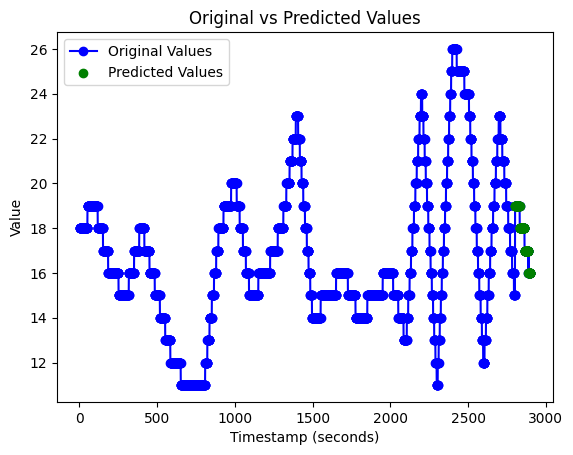

Plotting for patient ID: 140414


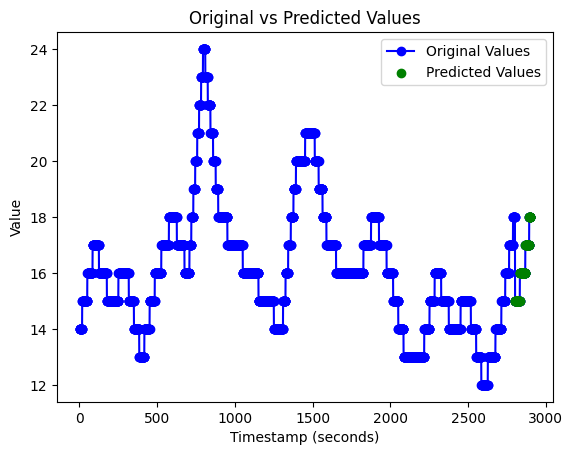

Plotting for patient ID: 141015


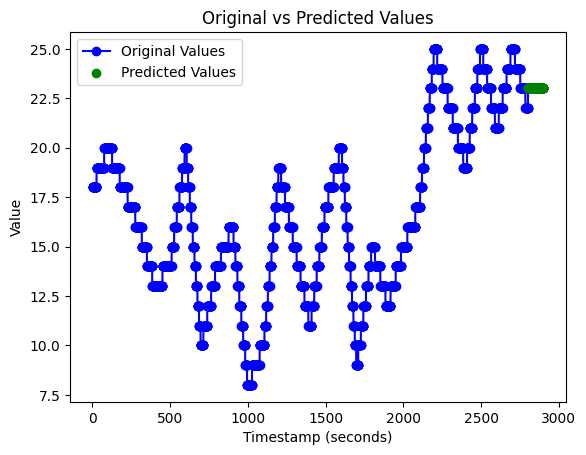

Plotting for patient ID: 139791


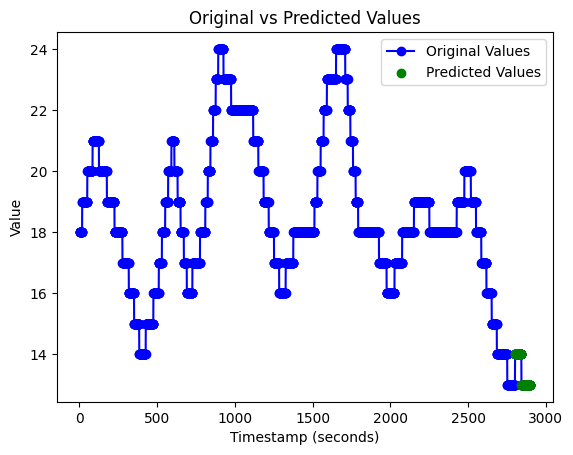

Plotting for patient ID: 139739


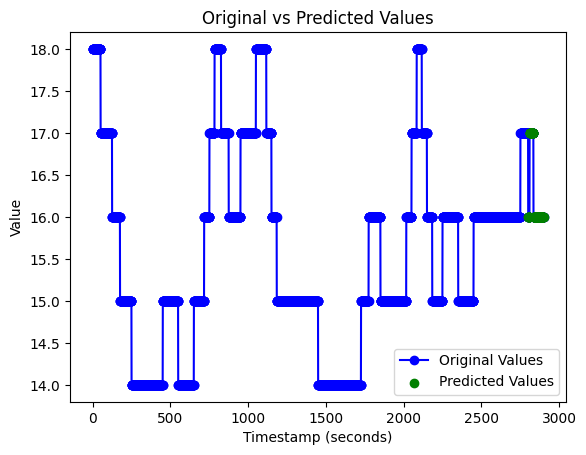

In [152]:
i=0
for pid in patient_ids:
  og=get_og_values(survival_data,pid)
  new_og=og[:2801]
  predictions=rr_rounded_predictions[i]
  all_resp_values.append(new_og+predictions)
  print("Plotting for patient ID:", pid)
  plot_combined_values(new_og,list(predictions))
  i+=1

In [153]:
all_resp = [val for values in all_resp_values for val in values]
result_df['RespRate'] = all_resp

In [154]:
result_df.to_csv('prophet_results.csv', index=False)